#Quantum Suppport Vector Machine (QSVM)

In [6]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [23]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# we need to make a quantum ciruit that get the data, then we can make a quantum kernel for it:
def create_quantum_circuit(data):
  qubits=[cirq.GridQubit(i,0) for i in range(len(data))] # number of data= number of qubits
  #for QSVM algorithm, we will have spaces as of number of our data points, and it will check similarity measure, then using kernel to create nonlinear state
  circuit=cirq.Circuit()
# because of using Grid, all data have index, so now we do this:
  for i, value in enumerate(data):
      circuit.append(cirq.rx(value).on(qubits[i]))
  circuit.append(cirq.measure(*qubits,key="QSVM results"))
  return circuit, qubits
def run_quantum_circuit(circuit, qubits, repetitions=10**2):
  sim=cirq.Simulator()
  r=sim.run(circuit, repetitions=10**2)
  m=np.array(r.measurements['QSVM results'])
  return m
def quantum_kernel(x):
  n_samples=x.shape[0]
  kernel_matrix=np.zeros((n_samples, n_samples))

  for i in range(n_samples):
    for j in range(n_samples):
      circuit, qubits=create_quantum_circuit(x[i]-x[j]) # getting output by kernel quantum function, that the create_quantum_circuit would take care of it.
      m=run_quantum_circuit(circuit, qubits)
      kernel_matrix[i,j]=np.mean(m)  # getting the expectation value of our measurements
  return kernel_matrix


QSVM algorithm could be implemented in different ways, one way is shown above. In some cases, they create a Bell state to create maximum entanglement on data. Some are making the whole quantum algoritthm for QSVM, but in here we want to make quantum kernels, and we create qubits equal to number of data we have, so that we can check the similarity

Generating Data using make_classification : making clusters using gaussian functions

In [30]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC  # for normalization
from sklearn.preprocessing import StandardScaler

x,y=make_classification(n_samples=100, n_features=4, n_informative=2,n_classes=2, random_state=42) #n_informative represents cluster states
x,y

(array([[-1.05383855, -1.02754411, -0.32929388,  0.82600732],
        [ 1.56931739,  1.306542  , -0.23938468, -0.3313761 ],
        [-0.35885569, -0.69102126, -1.22532865,  1.65214494],
        [-0.1368559 ,  0.46093758,  1.89691056, -2.2813861 ],
        [-0.04862909,  0.50230075,  1.77872961, -2.17105282],
        [ 2.30450019,  1.33970234, -2.24075406,  1.83991037],
        [-0.40925706,  0.32423734,  2.23245441, -2.58590856],
        [-0.7173148 , -0.88602706, -0.83311649,  1.31217492],
        [ 1.06173727,  1.05688647,  0.40238353, -0.91916686],
        [ 1.48052803,  1.28131775, -0.06692233, -0.50833095],
        [ 0.53479393,  0.21164583, -0.84389686,  0.82584805],
        [ 1.38991764,  1.22541983,  0.01066604, -0.56772453],
        [-1.79532002, -1.46361184,  0.37531604,  0.25415746],
        [-1.26898369, -0.68933585,  1.39175475, -1.20757158],
        [-1.56826626, -0.87306613,  1.65095783, -1.40735658],
        [-0.42795824, -0.72216846, -1.12868571,  1.56070438],
        

In [31]:
scale=StandardScaler()
x=scale.fit_transform(x) # it normalize x for me

quantum_kernel_matrix= quantum_kernel(x)
quantum_kernel_matrix  # it returns the measure of similarity for us in here

array([[0.    , 0.47  , 0.085 , ..., 0.1725, 0.515 , 0.1075],
       [0.485 , 0.    , 0.485 , ..., 0.29  , 0.2725, 0.485 ],
       [0.075 , 0.49  , 0.    , ..., 0.27  , 0.29  , 0.0125],
       ...,
       [0.1625, 0.26  , 0.2625, ..., 0.    , 0.52  , 0.2625],
       [0.4775, 0.3025, 0.2825, ..., 0.53  , 0.    , 0.2625],
       [0.1175, 0.4925, 0.005 , ..., 0.31  , 0.26  , 0.    ]])

In [32]:
model=SVC(kernel='precomputed') #if using linear instead of precomputed, it would return itself (with precomputed, we're providing it with computed kernel values)
model.fit(quantum_kernel_matrix, y) # our data is encoded in quantum manner here
y_pred=model.predict(quantum_kernel_matrix)

In [33]:
print("Actual", y)
print("Predicted", y_pred)

Actual [1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1]
Predicted [0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0]


              precision    recall  f1-score   support

           0       0.08      0.08      0.08        50
           1       0.08      0.08      0.08        50

    accuracy                           0.08       100
   macro avg       0.08      0.08      0.08       100
weighted avg       0.08      0.08      0.08       100



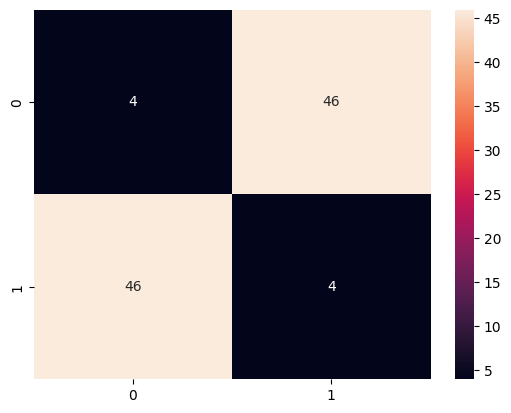

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



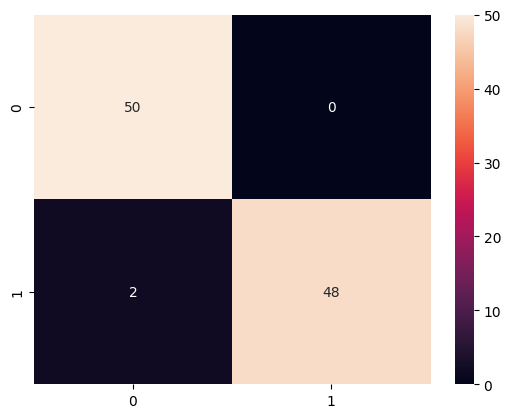

In [37]:
model=SVC(kernel='linear') # using linear instead of precomputed, it would return itself (with precomputed, we're providing it with computed kernel values)
model.fit(quantum_kernel_matrix, y) # our data is encoded in quantum manner here
y_pred=model.predict(quantum_kernel_matrix)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.90      0.94      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



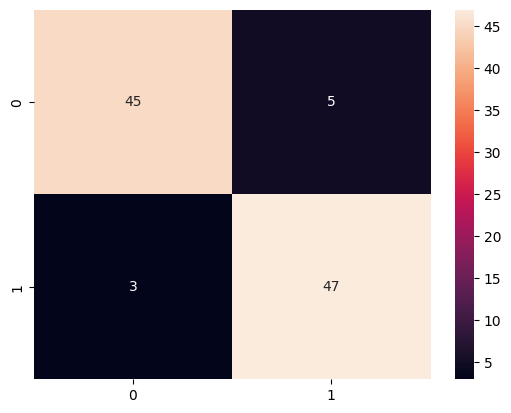

In [38]:
model=SVC(kernel='sigmoid') # using sigmoid here
model.fit(quantum_kernel_matrix, y) # our data is encoded in quantum manner here
y_pred=model.predict(quantum_kernel_matrix)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True)
print(classification_report(y, y_pred))

The point was to encode data on quantum space here.For QSVM, the quantum  Kernel could be linear and/or precomputed here.